# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


import the necessary libraries and load your dataset into a pandas DataFrame.

- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


In [58]:
def import_libraries():
    """
    Imports required libraries for data analysis.
    """
    global pd, np, plt, sns
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Set plot styles
    sns.set(style='whitegrid', palette='deep')
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 14

    print("Libraries imported successfully.")


In [59]:
# import the necessary libraries
import_libraries()

Libraries imported successfully.


### 1. Load the Dataset


Ensure the dataset is loaded correctly by displaying the first few rows.


In [60]:
def load_dataset(file_path):
    """
    Imports required libraries and loads the dataset into a pandas DataFrame.

    Parameters:
        file_path (str): The path to the CSV file containing the dataset.

    Returns:
        pd.DataFrame: The loaded DataFrame.
    """
    # # Import necessary libraries
    # import pandas as pd
    # import numpy as np

    # Load the dataset
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully with shape {df.shape}.")
        return df
    except FileNotFoundError:
        print("The file was not found. Please check the file path.")
        return None


In [61]:
# Load dataset
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = load_dataset(file_path)

Dataset loaded successfully with shape (65437, 114).


#### 2. Explore the Dataset


Summarize the Dataset by Displaying Column Data Types, Counts, and Missing Values

In [62]:
def summarize_dataset(df):
    """
    Summarizes the dataset by displaying column data types, counts, and missing values.

    Parameters:
        df (pd.DataFrame): The DataFrame to summarize.

    Returns:
        None
    """
    print("Dataset Summary:")
    print("\nColumn Data Types:")
    print(df.dtypes)
    print("\nColumn Counts and Missing Values:")
    missing_values = df.isnull().sum()
    print(pd.DataFrame({'Count': df.count(), 'Missing Values': missing_values}))


In [63]:
# summarize the dataset
summarize_dataset(df)

Dataset Summary:

Column Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Column Counts and Missing Values:
                     Count  Missing Values
ResponseId           65437               0
MainBranch           65437               0
Age                  65437               0
Employment           65437               0
RemoteWork           54806           10631
...                    ...             ...
JobSatPoints_11      29445           35992
SurveyLength         56182            9255
SurveyEase           56238            9199
ConvertedCompYearly  23435           42002
JobSat               29126           36311

[114 rows x 2 columns]


Generate Basic Statistics for Numerical Columns

In [64]:
def numerical_statistics(df):
    """
    Generates basic statistics for numerical columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing numerical columns.

    Returns:
        None
    """
    print("\nNumerical Columns Statistics:")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    print(df[numerical_cols].describe())


In [65]:
# Generates basis statics for numeric columns in the DtaFrame
numerical_statistics(df)


Numerical Columns Statistics:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000         0.

Identifying and Removing Inconsistencies

<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [66]:
def identify_inconsistencies(df, column_name):
    """
    Identifies inconsistent or irrelevant entries in a specific column.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        column_name (str): The column to check for inconsistencies.

    Returns:
        pd.Series: Counts of unique values in the column.
    """
    value_counts = df[column_name].value_counts(dropna=False)
    print(f"\nUnique values in '{column_name}':")
    print(value_counts)
    return value_counts


In [67]:
# Identifies inconsistent or irrelevant entries in a specific column
value_counts = identify_inconsistencies(df, 'Country')


Unique values in 'Country':
Country
United States of America                                11095
NaN                                                      6507
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
                                                        ...  
Niger                                                       1
Guinea                                                      1
Dominica                                                    1
Papua New Guinea                                            1
Solomon Islands                                             1
Name: count, Length: 186, dtype: int64


<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [68]:
def standardize_entries(df, column_name, mapping_dict):
    """
    Standardizes entries in a column by mapping inconsistent values to a consistent format.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The column to standardize.
        mapping_dict (dict): A dictionary mapping old values to new standardized values.

    Returns:
        pd.DataFrame: The DataFrame with standardized column entries.
    """
    df[column_name] = df[column_name].replace(mapping_dict)
    print(f"\nStandardized '{column_name}' column.")
    return df


Example Usage:

In [69]:
# Define a mapping dictionary for countries
country_mapping = {
    'United States of America': 'USA',
    'United States': 'USA',
    'U.S.': 'USA',
    'UK': 'United Kingdom',
    'England': 'United Kingdom',
    'Austria': 'Australia'
}
df = standardize_entries(df, 'Country', country_mapping)



Standardized 'Country' column.


Encoding Categorical Variables

Encode the Employment Column Using One-Hot Encoding

In [70]:
def encode_categorical_one_hot(df, column_name):
    """
    Encodes a categorical column using one-hot encoding.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The column to encode.

    Returns:
        pd.DataFrame: The DataFrame with one-hot encoded columns.
    """
    df = df.copy()
    one_hot = pd.get_dummies(df[column_name], prefix=column_name)
    df = df.drop(column_name, axis=1)
    df = df.join(one_hot)
    print(f"\nOne-hot encoded '{column_name}' column.")
    return df


In [71]:
# Encodes a categorical column using one-hot encoding: Enployment column
df = encode_categorical_one_hot(df, 'Employment')


One-hot encoded 'Employment' column.


### 5. Handling Missing Values


Identify Columns with the Highest Number of Missing Values

In [72]:
def identify_missing_values(df):
    """
    Identifies columns with the highest number of missing values.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        pd.DataFrame: A DataFrame containing columns and their missing value counts and percentages.
    """
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage': missing_percent
    }).sort_values(by='Missing Count', ascending=False)
    print("\nColumns with Missing Values:")
    print(missing_df[missing_df['Missing Count'] > 0])
    return missing_df


In [73]:
# Identifies columns with the highest number of misssing values
missing_df =identify_missing_values(df)


Columns with Missing Values:
                            Missing Count  Missing Percentage
AINextMuch less integrated          64289           98.245641
AINextLess integrated               63082           96.401119
AINextNo change                     52939           80.900714
AINextMuch more integrated          51999           79.464217
EmbeddedAdmired                     48704           74.428840
...                                   ...                 ...
YearsCode                            5568            8.508948
NEWSOSites                           5151            7.871693
LearnCode                            4949            7.563000
EdLevel                              4653            7.110656
AISelect                             4530            6.922689

[109 rows x 2 columns]


Impute Missing Values in Numerical Columns with Mean or Median

<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [74]:
def impute_numerical(df, column_name, strategy='mean'):
    """
    Imputes missing values in a numerical column using mean or median.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The numerical column to impute.
        strategy (str): The imputation strategy ('mean' or 'median').

    Returns:
        pd.DataFrame: The DataFrame with imputed values in the specified column.
    """
    df = df.copy()
    if strategy == 'mean':
        impute_value = df[column_name].mean()
    elif strategy == 'median':
        impute_value = df[column_name].median()
    else:
        raise ValueError("Strategy must be 'mean' or 'median'.")
    #df[column_name].fillna(impute_value, inplace=True)
    df[column_name] = df[column_name].fillna(impute_value)
    #df[column_name] = df.fillna({column_name: impute_value}, inplace=True)
    print(f"\nImputed missing values in '{column_name}' with {strategy}: {impute_value}")
    return df


In [75]:
# Imputes missing values in a numeric column using the mean or median.
df = impute_numerical(df, 'ConvertedCompYearly', strategy='median')


Imputed missing values in 'ConvertedCompYearly' with median: 65000.0


Impute Missing Values in Categorical Columns with the Most Frequent Value

<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [78]:
def impute_categorical(df, column_name):
    """
    Imputes missing values in a categorical column with the most frequent value.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The categorical column to impute.

    Returns:
        pd.DataFrame: The DataFrame with imputed values in the specified column.
    """
    df = df.copy()
    most_frequent = df[column_name].mode()[0]
    #df[column_name].fillna(most_frequent, inplace=True)
    #df[column_name] = df.fillna({column_name: most_frequent}, inplace=True)
    df[column_name] = df[column_name].fillna(most_frequent)
    print(f"\nImputed missing values in '{column_name}' with the most frequent value: {most_frequent}")
    return df


In [79]:
# IImputes missing values in a categorical column with the most frequent value: RemoteWork column
df = impute_categorical(df, 'RemoteWork')


Imputed missing values in 'RemoteWork' with the most frequent value: Hybrid (some remote, some in-person)


### 6. Feature Scaling and Transformation


Apply Min-Max Scaling to Normalize the ConvertedCompYearly Column

In [81]:
def min_max_scale(df, column_name):
    """
    Applies Min-Max Scaling to normalize a numerical column.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The numerical column to scale.

    Returns:
        pd.DataFrame: The DataFrame with a new normalized column.
    """
    df = df.copy()
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    df[column_name + '_Normalized'] = scaler.fit_transform(df[[column_name]])
    print(f"\nApplied Min-Max Scaling to '{column_name}'.")
    return df


In [82]:
# Applies Min-Max Scaling to normalize a numeric column.
df = min_max_scale(df, 'ConvertedCompYearly')


Applied Min-Max Scaling to 'ConvertedCompYearly'.


Log-Transform the ConvertedCompYearly Column to Reduce Skewness

In [85]:
def log_transform(df, column_name):
    """
    Applies log transformation to a numerical column to reduce skewness.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The numerical column to transform.

    Returns:
        pd.DataFrame: The DataFrame with a new log-transformed column.
    """
    df = df.copy()
    import numpy as np

    df[column_name + '_Log'] = np.log1p(df[column_name])
    print(f"\nApplied log transformation to '{column_name}'.")
    return df


In [86]:
# Applies log transformation to a numerical column to reduce skewness.
df = log_transform(df, 'ConvertedCompYearly')


Applied log transformation to 'ConvertedCompYearly'.


In [95]:
df


,ResponseId,MainBranch,Age,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,"Employment_Student, full-time;Not employed, but looking for work;Student, part-time","Employment_Student, full-time;Retired","Employment_Student, full-time;Student, part-time","Employment_Student, full-time;Student, part-time;Employed, part-time","Employment_Student, full-time;Student, part-time;Retired","Employment_Student, part-time","Employment_Student, part-time;Employed, part-time","Employment_Student, part-time;Retired",ConvertedCompYearly_Normalized,ConvertedCompYearly_Log
0,1,I am a developer by profession,Under 18 years old,Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,...,False,False,False,False,False,False,False,False,0.003998,11.082158
1,2,I am a developer by profession,35-44 years old,Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,False,False,False,False,False,False,False,False,0.003998,11.082158
2,3,I am a developer by profession,45-54 years old,Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,False,False,False,False,False,False,False,False,0.003998,11.082158
3,4,I am learning to code,18-24 years old,"Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,False,False,False,False,False,False,False,False,0.003998,11.082158
4,5,I am a developer by profession,18-24 years old,"Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,False,False,False,False,False,False,False,False,0.003998,11.082158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,NaN,...,False,False,False,False,False,False,False,False,0.003998,11.082158
65433,65434,I am a developer by profession,25-34 years old,Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,0.003998,11.082158
65434,65435,I am a developer by profession,25-34 years old,In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,API document(s) and/or SDK document(s);AI-powe...,...,False,False,False,False,False,False,False,False,0.003998,11.082158
65435,65436,I am a developer by profession,18-24 years old,"Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,False,False,False,False,False,False,False,False,0.003998,11.082158


### 7. Feature Engineering


Create a New Column `ExperienceLevel` Based on the `YearsCodePro` Column

In [88]:
def create_experience_level(df, column_name='YearsCodePro'):
    """
    Creates a new column 'ExperienceLevel' based on the 'YearsCodePro' column.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The column containing years of professional coding experience.

    Returns:
        pd.DataFrame: The DataFrame with the new 'ExperienceLevel' column.
    """
    df = df.copy()
    # Ensure 'YearsCodePro' is numeric
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    
    # Define experience level based on years of coding
    def experience_level(years):
        if pd.isnull(years):
            return 'Unknown'
        elif years < 1:
            return 'Entry-level'
        elif years < 3:
            return 'Junior'
        elif years < 5:
            return 'Intermediate'
        elif years < 10:
            return 'Advanced'
        else:
            return 'Expert'
    
    df['ExperienceLevel'] = df[column_name].apply(experience_level)
    print(f"\nCreated 'ExperienceLevel' column based on '{column_name}'.")
    return df


In [96]:
# Creates a new column 'ExperienceLevel' based on the 'YearsCodePro' column.
df = create_experience_level(df, 'YearsCodePro')


Created 'ExperienceLevel' column based on 'YearsCodePro'.


Putting It All Together

Here's how you can use these functions in your analysis pipeline:

In [ ]:
#Imports required libraries for data analysis.
import_libraries()

# Load the Dataset
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'  # Replace with your actual file path
df = load_dataset(file_path)

if df is not None:
    # Step 2: Explore the Dataset
    summarize_dataset(df)
    numerical_statistics(df)
    
    # Step 3: Identifying and Removing Inconsistencies
    # Identify inconsistencies in 'Country'
    country_values = identify_inconsistencies(df, 'Country')
    # Standardize 'Country' entries
    country_mapping = {'United States of America': 'USA', 'UK': 'United Kingdom'}  # Example mappings
    df = standardize_entries(df, 'Country', country_mapping)
    
    # Step 4: Encoding Categorical Variables
    df = encode_categorical_one_hot(df, 'Employment')
    
    # Step 5: Handling Missing Values
    missing_df = identify_missing_values(df)
    # Impute numerical column 'ConvertedCompYearly'
    df = impute_numerical(df, 'ConvertedCompYearly', strategy='median')
    # Impute categorical column 'RemoteWork'
    df = impute_categorical(df, 'RemoteWork')
    
    # Step 6: Feature Scaling and Transformation
    df = min_max_scale(df, 'ConvertedCompYearly')
    df = log_transform(df, 'ConvertedCompYearly')
    
    # Step 7: Feature Engineering
    df = create_experience_level(df)
    
    # Now, 'df' is ready for further analysis or modeling


Visualizations and Additional Analysis

After preprocessing, you might want to visualize the data to gain insights:

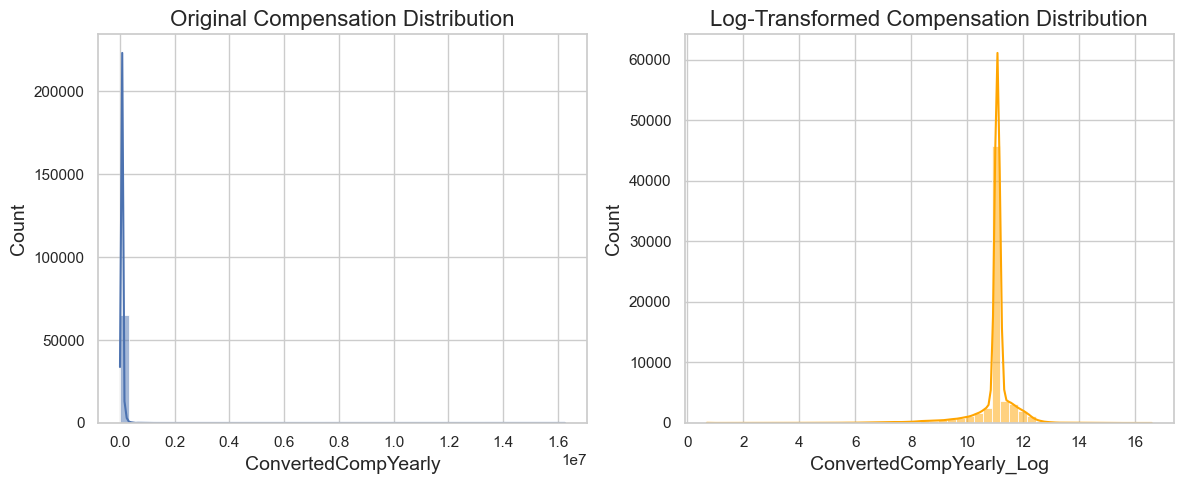

In [98]:
# Example: Visualize the distribution of 'ConvertedCompYearly' before and after log transformation
import matplotlib.pyplot as plt
import seaborn as sns

# Original distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)
plt.title('Original Compensation Distribution')
plt.xlabel('ConvertedCompYearly')

# Log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['ConvertedCompYearly_Log'], bins=50, kde=True, color='orange')
plt.title('Log-Transformed Compensation Distribution')
plt.xlabel('ConvertedCompYearly_Log')

plt.tight_layout()
plt.show()
